We'll begin by showing (via rectangular coordinate) that we get the same equations as in class. First let $(x_1,y_1)$ define the location of mass $m_1$ and $(x_2,y_2)$ define the location of $m_2$. Now suppose $m_1>>m_2$ and let us work within the $m_1$ frame. Then the location of $m_1$ is $(0,0)$ and the location of $m_2$ is $(X,Y)$ where $X = x_2 - x_1$ and $Y = y_2 - y_1$. Note that by conservation of momentum all of our motion must be confined to a plane, and I am assuming I'm working in that plane. This is why I've omitted Z coordinates from my analysis. 

We now define our Latrangian, in this case $m_1$ is always at rest (because we are in the same frame as it) so $$T = \frac{1}{2}m_2(\dot{X^2}+\dot{Y^2})$$ and we know $U$ (which in this case is from gravity) is given by $$U=\frac{-Gm_1m_2}{\sqrt{X^2+Y^2}}$$ So it is that $$L = \frac{1}{2}m_2(\dot{X^2}+\dot{Y^2}) - \frac{-Gm_1m_2}{\sqrt{X^2+Y^2}}$$

We now set up our equations $$\frac{dL}{dX} = \frac{-Gm_1m_2X}{\sqrt{(X^2+Y^2)^3}}$$ and $$\frac{dL}{dY} = \frac{-Gm_1m_2Y}{\sqrt{(X^2+Y^2)^3}}$$ additionally $$\frac{d}{dt}\frac{dL}{d\dot{x}}=m_2\dot{\dot{X}}$$ $$\frac{d}{dt}\frac{dL}{d\dot{y}}=m_2\dot{\dot{Y}}$$

This makes our two equaions $$I) m_2\dot{\dot{X}}=\frac{-Gm_1m_2X}{\sqrt{(X^2+Y^2)^3}}$$ and $$I) m_2\dot{\dot{Y}}=\frac{-Gm_1m_2Y}{\sqrt{(X^2+Y^2)^3}}$$ If we take $I^2$ and $II^2$ we get $$ m_2^2\dot{\dot{X^2}}=\frac{G^2m_1^2m_2^2X^2}{(X^2+Y^2)^3}$$ and $$ m_2^2\dot{\dot{Y^2}}=\frac{G^2m_1^2m_2^2Y^2}{(X^2+Y^2)^3}$$ then $I^2+II^2$ is $$m_2^2(\dot{\dot{X^2}}+\dot{\dot{Y^2}})=\frac{G^2m_1^2m_2^2(X^2+Y^2)}{(X^2+Y^2)^3}=\frac{G^2m_1^2m_2^2}{(X^2+Y^2)^2}$$

Now let $\vec{r} = (X,Y)$ then $|\vec{r}|=\sqrt{X^2+Y^2}$ and $|\dot{\dot{\vec{r}}}|=(\dot{\dot{X}},\dot{\dot{Y}})$ meaning $|\dot{\dot{\vec{r}}}|=\sqrt{\dot{\dot{X^2}}+\dot{\dot{Y^2}}}$ if we plug these values for $r$ into $m_2^2(\dot{\dot{X^2}}+\dot{\dot{Y^2}})=\frac{G^2m_1^2m_2^2(X^2+Y^2)}{(X^2+Y^2)^3}=\frac{G^2m_1^2m_2^2}{(X^2+Y^2)^2}$ we get $$m_2^2(|\dot{\dot{\vec{r}}}|)^2=\frac{G^2m1^2m2^2}{|\vec{r^4}|}$$ which we can reduce down to $$|\dot{\dot{\vec{r}}}|=\frac{Gm_1}{|\vec{r^2}|}$$

Which is an equation in "one dimension". I put one dimension in quotes here becasue $|r|$ really represents the seperation between the bodies as measured in $x$ and $y$, but we have shown that you can reduce the entire question down a matter of $|r|$ alone. 

We begin by defining a class to help with the orbits

# Gravitational Orbits Class & Utility Functions

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image


class GravitationalOrbits():
    """
    This class implements the parameters and Lagrange equations for 
    two bodiese orbiting under gravitational attraction.
    
    Parameters
    ----------
    m_1 : float 
    m_2 : float 
    G : float 
    
    Methods
    -------
    dy_dt(t,y)
        Returns the right side of the differential equation vector y, 
        for a given time t and the needed values of y
    """
    def __init__(self, m_1=1.,m_2=1.,G=1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
        
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeg: 
        [dx/dt d^2z/dt^2]
        
        Parameters
        ----------
        t: float
            time
        z: float 
            A vector with 8 components with 
            z[0] = x_1(t) and z[1] = x_dot_1(t)
            z[2] = y_1(t) and z[3] = y_dot_1(t)
            z[4] = x_2(t) and z[5] = x_dot_2(t)
            z[6] = y_2(t) and z[7] = y_dot_2(t)
            
        Returns 
        --------
        
        """
        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2] - z[6])**2 )
        return[ \
                z[1], self.G * self.m_2 * (z[4] - z[0]) / r_12**3, \
                z[3], self.G * self.m_2 * (z[6] - z[2]) / r_12**3, \
                z[5], -self.G * self.m_1 * (z[4] - z[0]) / r_12**3, \
                z[7], -self.G * self.m_1 * (z[6] - z[2]) / r_12**3, \
              ]
    
    def solve_ode(self, t_pts, z_0, 
                 abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given the initial conditions. We can change the 
        error values for more accurate answers
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]),
                             z_0, t_eval=t_pts, method='RK23',
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    def sovle_ode_Leapfrog(self, t_pts, z_0):
        """
        Solve the ODE given by initial conditions with the leapfrog method
        """
        delta_t = t_pts[1] - t_pts[0]
        
        x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
                x_2_0, x_dot_2_0, y_2_0, y_dot_2_0 = z_0
        
        
        #initialize the arrays with zeros
        num_t_pts = len(t_pts)
        
        x_1 = np.zeros(num_t_pts)
        x_dot_1 = np.zeros(num_t_pts)
        x_dot_1_half = np.zeros(num_t_pts)
    
        y_1 = np.zeros(num_t_pts)
        y_dot_1 = np.zeros(num_t_pts)
        y_dot_1_half = np.zeros(num_t_pts)
        
        x_2 = np.zeros(num_t_pts)
        x_dot_2 = np.zeros(num_t_pts)
        x_dot_2_half = np.zeros(num_t_pts)
        
        y_1 = np.zeros(num_t_pts)
        y_dot_2 = np.zeros(num_t_pts)
        y_dot_2_half = np.zeros(num_t_pts)
        
        #Initial Conditions 
        x_1[0] = x_1_0
        x_dot_1[0] = x_dot_1_0
        
        y_1[0] = y_1_0
        y_dot_1[0] = y_dot_1_0
        
        x_2[0] = x_2_0
        x_dot_2[0] = x_dot_2_0
        
        y_2[0] = y_2_0
        y_dot_2[0] = y_dot_2_0
        
        #Step through the differential equation
        for i in np.arrange(num_t_pts - 1):
            t = t_pts[i]
            
            z = [x_1[i],x_dot_1[i],y_1[i],y_dot_1[i], \
                 x_2[i],x_dot_2[i],y_2[i],y_dot_2[i]]
            out = self.dz_dt(t,z)
            
            x_dot_1_half[i] = x_dot_1[i] + out[1] * delta_t/2.
            x_1[i+1] = x_1[i] + x_dot_1_half[i] * delta_t
            
            y_dot_1_half[i] = y_dot_1[i] + out[3] * delta_t/2.
            y_1[i+1] = y_1[i] + y_dot_1_half[i] * delta_t
            
            x_dot_2_half[i] = x_dot_2[i] + out[1] * delta_t/2.
            x_2[i+1] = x_2[i] + x_dot_2_half[i] * delta_t
            
            y_dot_2_half[i] = y_dot_2[i] + out[3] * delta_t/2.
            y_2[i+1] = y_2[i] + y_dot_2_half[i] * delta_t
            
            z = [x_1[i+1], x_dot_1[i], y_1[i+1], y_dot_1[i], \
                 x_2[i+1], x_dot_2[i], y_2[i+1], y_dot_2[i]]
            out = self.dz_dt(t,z)
            
            x_dot_1[i+1] = x_dot_1_half[i] + out[1] * delta_t/2.
            y_dot_1[i+1] = y_dot_1_half[i] + out[3] * delta_t/2.
            x_dot_2[i+1] = x_dot_2_half[i] + out[5] * delta_t/2.
            y_dot_2[i+1] = y_dot_2_half[i] + out[7] * delta_t/2.
            
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    def solve_ode_Leapfrog_n(self, t_pts, z_0):
        """
        Solve the ODE for the set starting conditions using the leapfrog
        method
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the z array with zeros 
        num_t_pts = len(t_pts)
        n_tot = len(z_0)
        z = np.zeros( shape=(n_tot, num_t_pts) )
        dot_half = np.zeros( int(n_tot/2) )
        
        #Initial conditions 
        z[:,0] = z_0
        
        #go through the equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z_now = z[:,i]
            out = np.asarray( self.dz_dt(t, z_now) )
            
            dot_half = z_now[1::2] + out[1::2] * delta_t/2.
            z[0::2, i+1] = z_now[0::2] + dot_half * delta_t
            
            z_now[0::2] = z[0::2, i+1]
            out = np.asarray( self.dz_dt(t, z_now) )
            
            z[1::2, i+1] = dot_half + out[1::2] * delta_t/2.
            
        return z

In [2]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
               color=None, linestyle=None, semilogy=False, loglog=False,
               ax=None):
    """
    Typical plotting funtion
    """
    if ax is None: # if we're not passed an axis we should make one
        ax = plt.gca()
        
    if (semilogy):
        line, = ax.semilogy(x, y, label=label,
                           color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label,
                         color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label,
                       color=color, linestyle=linestyle)
        
    if label is not None:
        ax.legend()
    if title is not None:
        ax.set_title(title)
    if axis_labels is not None:
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        
    return ax, line

In [3]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()
    return start_index, stop_index

# Now we can make the plots #

In [4]:
# We start by getting the labels for our plots 
orbit_labels = (r'$x$', r'$y$')

#Set the plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

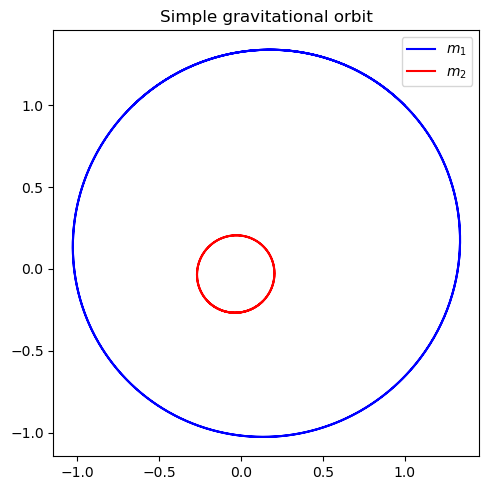

In [5]:
#We begin plotting once again...
t_start = 0.
t_end = 10.
delta_t = 0.01

G = 1.
m_1 = 1.
m_2 = 5.

# Get our set of orbits
ol = GravitationalOrbits(m_1, m_2, G)

#p1_0 = [1,1]
#p1_dot_0 = [-1.,1.]


# get our function set up
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot, x_2, x_dot2, y_2, y_dot_2 = \
    ol.solve_ode(t_pts, z_0)


# start the plot!
fig = plt.figure(figsize=(5,5))
#overall_title = 'Simple gravitational Orbit'
#fig.suptitle(overall_title, va='baseline')

# Now making the first orbit plot
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)



fig.tight_layout()
fig.savefig('simple_orbits.png', bbox_inches='tight')